<a href="https://colab.research.google.com/github/emidio90/House-price-prediction-machine-learning/blob/main/ProgettoFinale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preprocessing

Importiamo le librerie e il dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, learning_curve
RANDOM_SEED = 0  #Impostiamo il seed a 0 in modo da garantire la replicabilità dei risultati

CSV_URL = "https://proai-datasets.s3.eu-west-3.amazonaws.com/housing.csv"
df = pd.read_csv(CSV_URL)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


Controlliamo che non ci sia nessun valore nullo

In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


Calcoliamo la matrice di correlazione

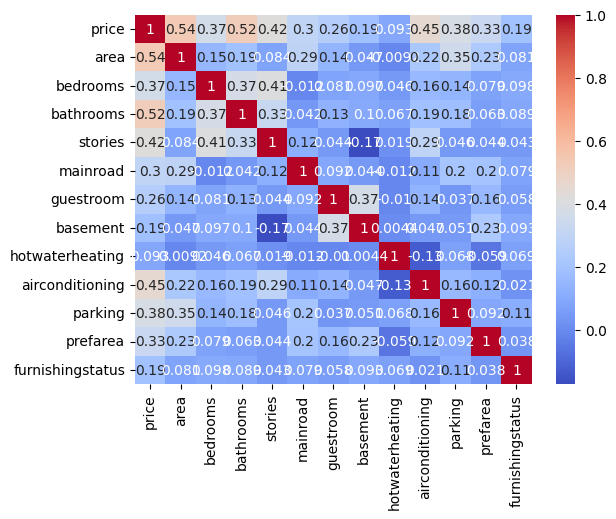

<Figure size 4000x4000 with 0 Axes>

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.figure(figsize=(40,40))
plt.show()

Sembra che il prezzo sia maggiormente correlato con l'area, il numero di bagni e leggermente con la presenza di aria condizionata.

### Regressione

Impostiamo "price" come la variabile target, poi suddividiamo il dataset in set di addestramento e set di test

In [ ]:
X = df.drop("price", axis=1).values
y = df["price"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(381, 12) (381,)
(164, 12) (164,)


Andiamo a standardizzare i dati

In [ ]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

Addestriamo un semplice modello di regressione lineare

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

Scriviamo la funzione per valutare i modelli

In [ ]:
def evaluate_model(model, dataset):

  X, y = dataset

  y_pred = model.predict(X)

  if hasattr(model, "coef_"):
    non_zero_coef = np.count_nonzero(model.coef_)
  else:
    non_zero_coef = None

  print(f"MSE: {mean_squared_error(y, y_pred):.3f}")
  print(f"R2: {r2_score(y, y_pred):.3f}")
  print(f"Number of non-zero coefficients: {non_zero_coef}")

Valutiamo il modello sul set di addestramento

In [ ]:
evaluate_model(lr,(X_train_scaled, y_train))

MSE: 1204930725280.427
R2: 0.656
Number of non-zero coefficients: 12


Valutiamo il modello sul set di test

In [ ]:
evaluate_model(lr,(X_test_scaled, y_test))

MSE: 961887082256.527
R2: 0.723
Number of non-zero coefficients: 12


### Regolarizzazione

Proviamo con un modello Ridge che implementa regolarizzazione L2 e valutiamo le sue prestazioni con vari valori di alpha

In [ ]:
for alpha in [1., 10., 100.]:
  ridge_model = Ridge(alpha=alpha)
  ridge_model.fit(X_train_scaled, y_train)
  print(f"\nRidge con alpha: {alpha}")
  print("Train set")
  evaluate_model(ridge_model, (X_train_scaled, y_train))
  print("Test set")
  evaluate_model(ridge_model, (X_test_scaled, y_test))


Ridge con alpha: 1.0
Train set
MSE: 1204935449596.848
R2: 0.656
Number of non-zero coefficients: 12
Test set
MSE: 961436118597.690
R2: 0.723
Number of non-zero coefficients: 12

Ridge con alpha: 10.0
Train set
MSE: 1205382268601.551
R2: 0.656
Number of non-zero coefficients: 12
Test set
MSE: 958023427085.297
R2: 0.724
Number of non-zero coefficients: 12

Ridge con alpha: 100.0
Train set
MSE: 1236533711380.034
R2: 0.647
Number of non-zero coefficients: 12
Test set
MSE: 966735119763.111
R2: 0.721
Number of non-zero coefficients: 12


Proviamo con un modello Lasso che implementa regolarizzazione L1 e valutiamo le sue prestazioni con vari valori di alpha

In [ ]:
for alpha in [1., 10., 100.]:
  lasso_model = Lasso(alpha=alpha)
  lasso_model.fit(X_train_scaled, y_train)
  print(f"\nLasso con alpha: {alpha}")
  print("Train set")
  evaluate_model(lasso_model, (X_train_scaled, y_train))
  print("Test set")
  evaluate_model(lasso_model, (X_test_scaled, y_test))


Lasso con alpha: 1.0
Train set
MSE: 1204930725286.426
R2: 0.656
Number of non-zero coefficients: 12
Test set
MSE: 961886232398.791
R2: 0.723
Number of non-zero coefficients: 12

Lasso con alpha: 10.0
Train set
MSE: 1204930725853.378
R2: 0.656
Number of non-zero coefficients: 12
Test set
MSE: 961878589798.099
R2: 0.723
Number of non-zero coefficients: 12

Lasso con alpha: 100.0
Train set
MSE: 1204930783771.220
R2: 0.656
Number of non-zero coefficients: 12
Test set
MSE: 961802684799.619
R2: 0.723
Number of non-zero coefficients: 12


Proviamo con un modello ElasticNet ibrido L1 e L2 e valutiamo le sue prestazioni con vari valori di alpha

In [ ]:
for alpha in [1., 10., 100.]:
  elastic_model = ElasticNet(alpha=alpha, l1_ratio=0.5)
  elastic_model.fit(X_train_scaled, y_train)
  print(f"\nElasticNet con alpha: {alpha}")
  print("Train set")
  evaluate_model(elastic_model, (X_train_scaled, y_train))
  print("Test set")
  evaluate_model(elastic_model, (X_test_scaled, y_test))



ElasticNet con alpha: 1.0
Train set
MSE: 1293240227187.340
R2: 0.631
Number of non-zero coefficients: 12
Test set
MSE: 1016384763294.284
R2: 0.707
Number of non-zero coefficients: 12

ElasticNet con alpha: 10.0
Train set
MSE: 2295477290591.440
R2: 0.345
Number of non-zero coefficients: 12
Test set
MSE: 2111544557138.633
R2: 0.391
Number of non-zero coefficients: 12

ElasticNet con alpha: 100.0
Train set
MSE: 3304926259120.496
R2: 0.056
Number of non-zero coefficients: 12
Test set
MSE: 3246472590811.370
R2: 0.064
Number of non-zero coefficients: 12


Fra tutti i modelli, ElasticNet è quello che dà risultati di R2 peggiori.

### Cross Validation

Andiamo ad effettuare la validazione incrociata utilizzando il modello che aveva dato i risultati migliori, cioè Ridge con alpha=10

In [ ]:
train_score = []
test_score = []
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

for train_index, test_index in kf.split(X):
  X_train_fold, X_test_fold = X[train_index], X[test_index]
  y_train_fold, y_test_fold = y[train_index], y[test_index]

  scaler = StandardScaler()
  X_train_fold_scaled = scaler.fit_transform(X_train_fold)
  X_test_fold_scaled = scaler.transform(X_test_fold)

  model = Ridge(alpha=10.)
  model.fit(X_train_fold_scaled, y_train_fold)

  r2_train = r2_score(y_train_fold, model.predict(X_train_fold_scaled))
  r2_test = r2_score(y_test_fold, model.predict(X_test_fold_scaled))

  train_score.append(r2_train)
  test_score.append(r2_test)

print("\nValidazione incrociata con Ridge (alpha=10):")
print(f"R2 medio (train): {np.mean(train_score):.3f}")
print(f"R2 medio (test): {np.mean(test_score):.3f}")


Validazione incrociata con Ridge (alpha=10):
R2 medio (train): 0.681
R2 medio (test): 0.654


### Learning Curve

Andiamo a visualizzare e confrontare le learning curves dei vari modelli

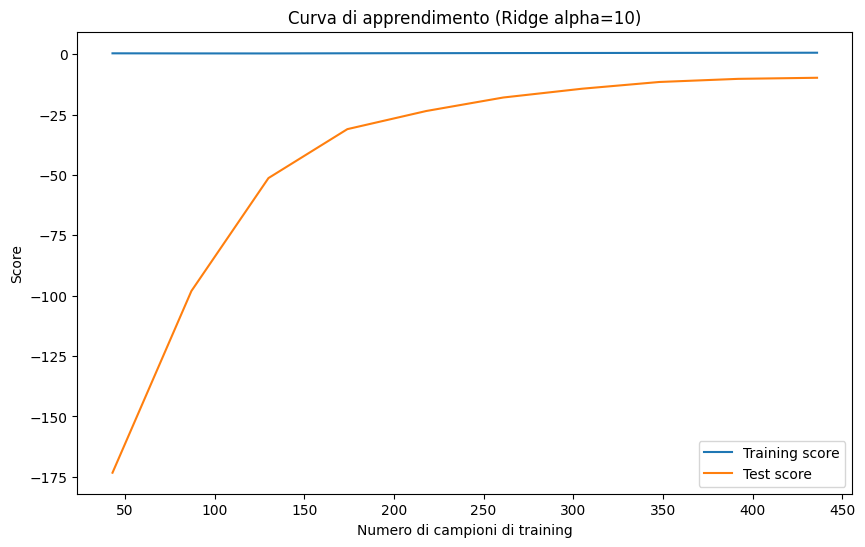

In [ ]:
# Curva di apprendimento per Ridge
training_sizes, train_scores, test_scores = learning_curve(
    Ridge(alpha=10), X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, random_state=RANDOM_SEED
)

# Media dei punteggi
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Grafico della curva di apprendimento
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_scores_mean, label="Training score")
plt.plot(training_sizes, test_scores_mean, label="Test score")
plt.xlabel("Numero di campioni di training")
plt.ylabel("Score")
plt.title("Curva di apprendimento (Ridge alpha=10)")
plt.legend()
plt.show()

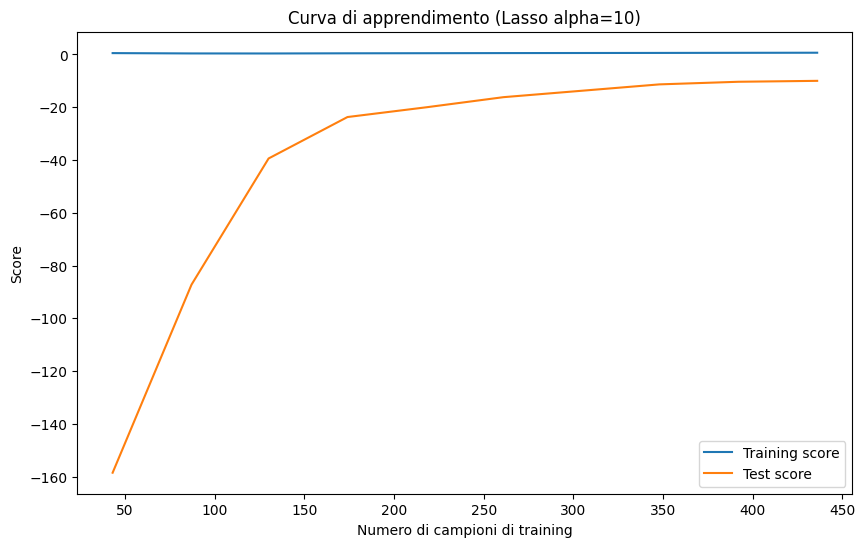

In [ ]:
# Curva di apprendimento per Lasso
training_sizes, train_scores, test_scores = learning_curve(
    Lasso(alpha=10), X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, random_state=RANDOM_SEED
)

# Media dei punteggi
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Grafico della curva di apprendimento
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_scores_mean, label="Training score")
plt.plot(training_sizes, test_scores_mean, label="Test score")
plt.xlabel("Numero di campioni di training")
plt.ylabel("Score")
plt.title("Curva di apprendimento (Lasso alpha=10)")
plt.legend()
plt.show()

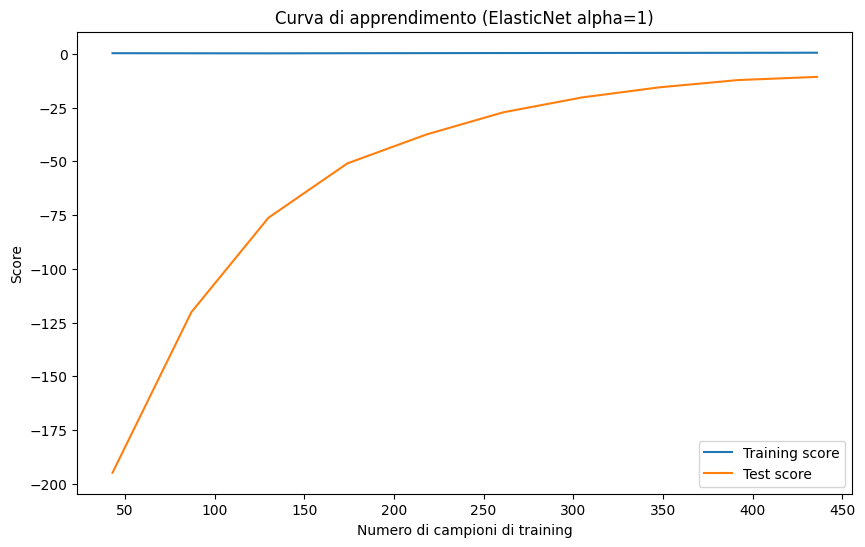

In [ ]:
# Curva di apprendimento per ElasticNet
training_sizes, train_scores, test_scores = learning_curve(
    ElasticNet(alpha=1., l1_ratio=0.5), X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, random_state=RANDOM_SEED
)

# Media dei punteggi
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Grafico della curva di apprendimento
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_scores_mean, label="Training score")
plt.plot(training_sizes, test_scores_mean, label="Test score")
plt.xlabel("Numero di campioni di training")
plt.ylabel("Score")
plt.title("Curva di apprendimento (ElasticNet alpha=1)")
plt.legend()
plt.show()

### Distribuzione dei residui

Andiamo a visualizzare la distribuzione dei residui, per valutare se il modello si adatta bene ai dati

In [ ]:
def plot_residuals(model, X_train_scaled, X_test_scaled, y_train, y_test):
    # Predizioni
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    # Calcolo residui
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred

    #Creazione del grafico
    plt.figure(figsize=(12, 6))
    # Distribuzione dei residui del training set
    plt.subplot(1, 2, 1)
    sns.histplot(residuals_train, kde=True, bins=30, color='blue')
    plt.title("Distribuzione dei Residui (Training Set)")
    plt.xlabel("Residui")
    plt.ylabel("Frequenza")
    # Distribuzione dei residui del test set
    plt.subplot(1, 2, 2)
    sns.histplot(residuals_test, kde=True, bins=30, color='green')
    plt.title("Distribuzione dei Residui (Test Set)")
    plt.xlabel("Residui")
    plt.ylabel("Frequenza")

    plt.tight_layout()
    plt.show()

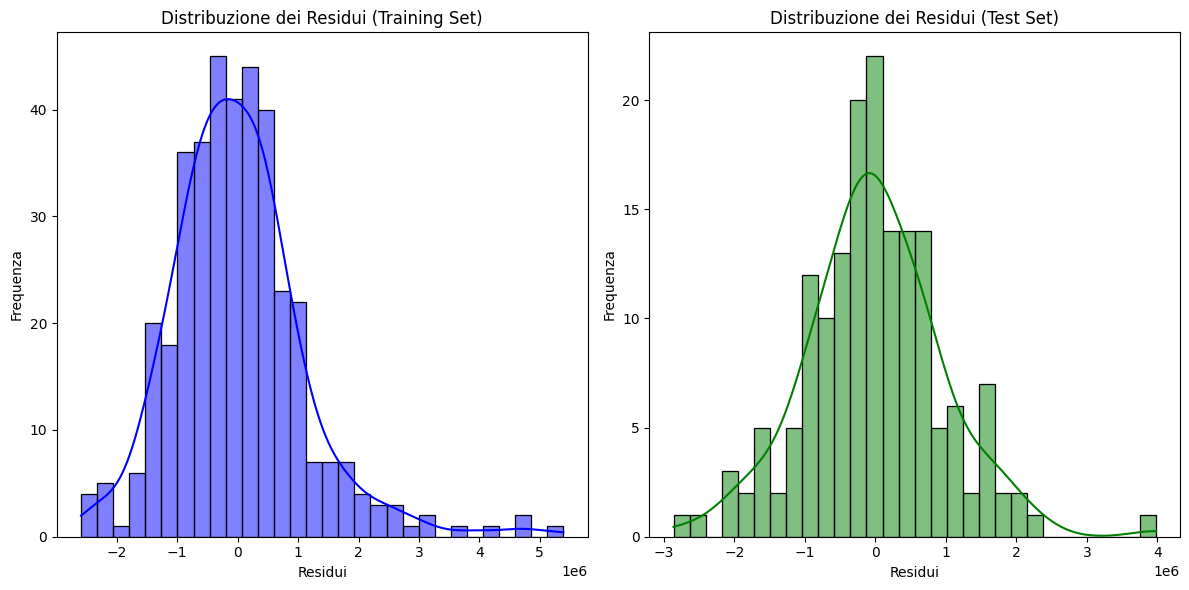

In [ ]:
plot_residuals(Ridge(alpha=10).fit(X_train_scaled, y_train), X_train_scaled, X_test_scaled, y_train, y_test)

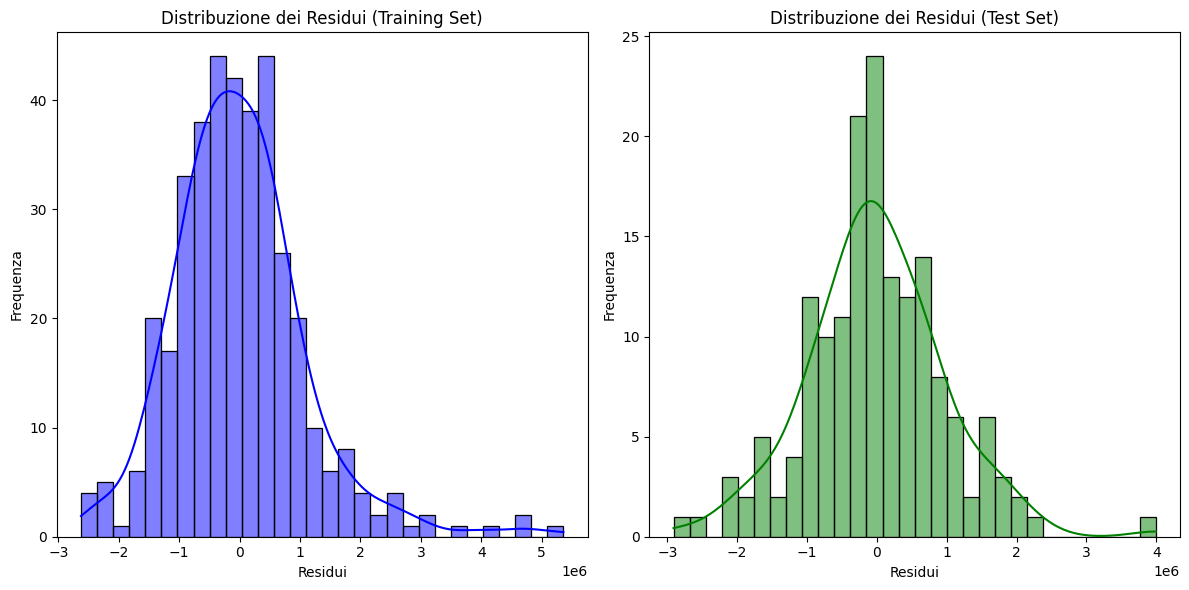

In [ ]:
plot_residuals(Lasso(alpha=10).fit(X_train_scaled, y_train), X_train_scaled, X_test_scaled, y_train, y_test)

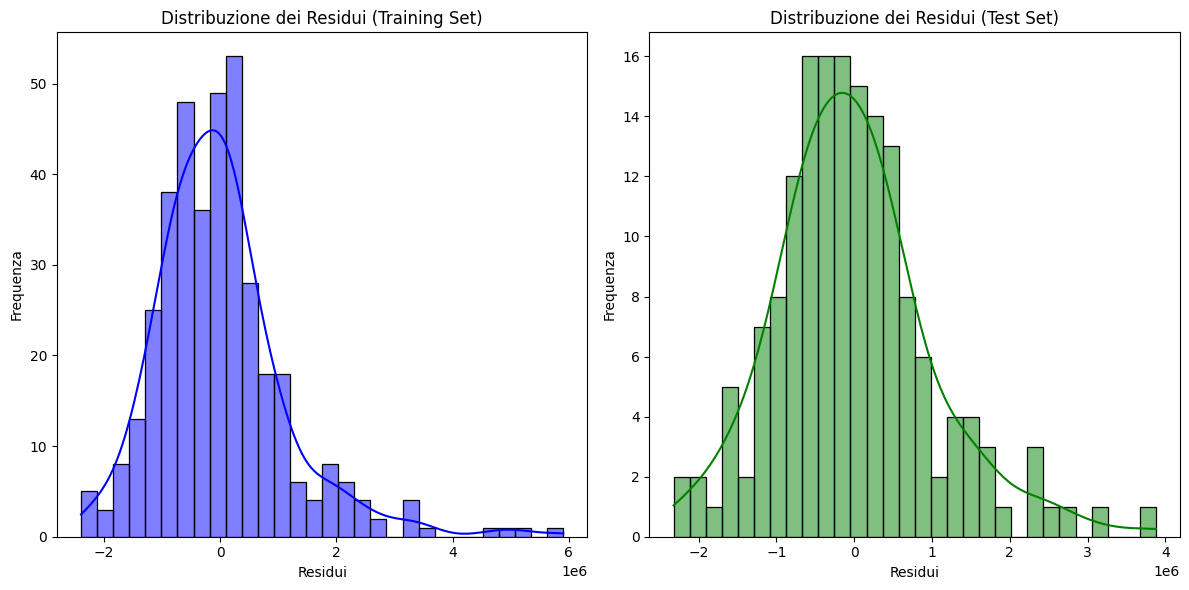

In [ ]:
plot_residuals(ElasticNet(alpha=1., l1_ratio=0.5).fit(X_train_scaled, y_train), X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
X = df[["area", "bathrooms", "airconditioning", "stories"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

for i in range(1, 6):
  poly = PolynomialFeatures(i)
  x_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)